In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn
import konlpy
from wordcloud import WordCloud
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')

D:\python2020\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
D:\python2020\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data = pd.read_csv("clean_ibk3.csv",encoding='utf8')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10596 entries, 0 to 10595
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   datetime        10596 non-null  object
 1   date            10596 non-null  object
 2   up/down         10596 non-null  int64 
 3   clean_headline  10596 non-null  object
 4   clean_content   10596 non-null  object
dtypes: int64(1), object(4)
memory usage: 414.0+ KB


In [4]:
data['datetime'] = data['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [5]:
data.isnull().sum()

datetime          0
date              0
up/down           0
clean_headline    0
clean_content     0
dtype: int64

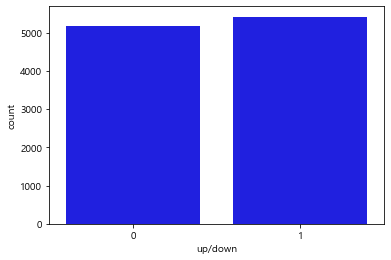

In [6]:
sns.countplot(data['up/down'], color='blue')  
plt.show()

In [7]:
kkma = konlpy.tag.Kkma()

In [8]:
# 명사 추출
my_words = []
for a_line in data['clean_content']:
    my_words += kkma.nouns(a_line)

In [9]:
# 단음절 제거.
my_words_2 = []
for a_word in my_words:
    if len(a_word) > 1:
        my_words_2 += [a_word]

In [10]:
# Series 로 변환.
my_series = pd.Series(my_words_2)

In [11]:
# my_series이거를 데이터프레임에 값으로 붙여서 tfidf만 적용할지 생각해보기..

In [12]:
# 도수 분포표. Top 20
my_word_counts = my_series.value_counts().sort_values(ascending=False)
my_word_counts[:20]

투자      5757
증권      4931
금융      4831
시장      4291
투자증권    4223
한국      4170
기업      4056
은행      4013
억원      3844
올해      3172
전망      3029
국내      3015
때문      2991
지난해     2938
이상      2934
우리      2831
이후      2829
실적      2806
연구원     2766
최근      2746
dtype: int64

In [13]:
# 도수 분포표. Top 20
my_word_counts = my_series.value_counts().sort_values(ascending=True)
my_word_counts[:200]

프파이빗       1
월례강좌       1
인터넷소통분야    1
선발하겠       1
레오투자자문     1
          ..
내부검토       1
진흥책        1
진취적        1
학습병행       1
경매학원       1
Length: 200, dtype: int64

In [ ]:
plt.plot(my_word_counts)
plt.show()

In [ ]:
a_long_sentence = ' '.join(my_words_2)

In [ ]:
wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", background_color='white', max_words=30)  # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence)
wc.words_

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # 축을 꺼줌.
plt.show()